In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


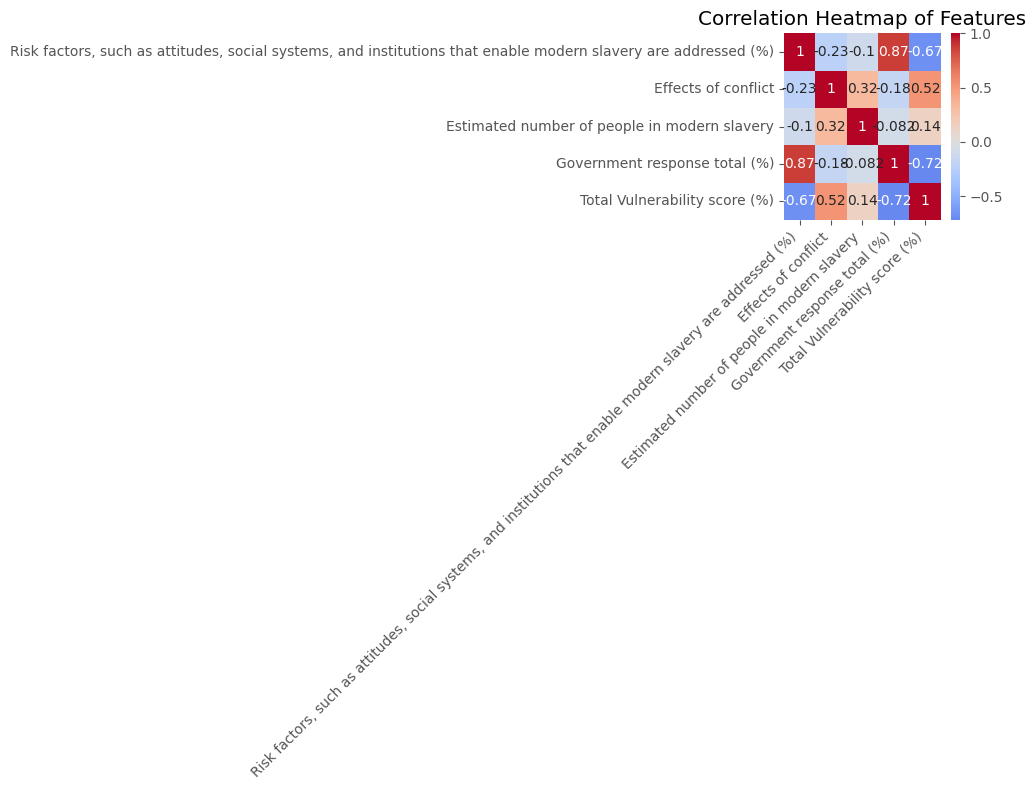

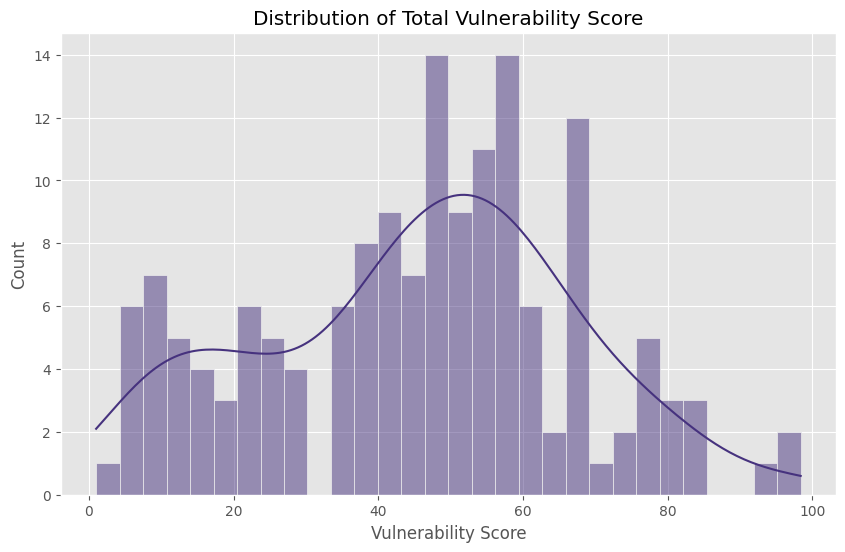

Model Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.71      0.42      0.53        12
           2       0.67      0.83      0.74        12

    accuracy                           0.72        32
   macro avg       0.73      0.75      0.72        32
weighted avg       0.72      0.72      0.70        32



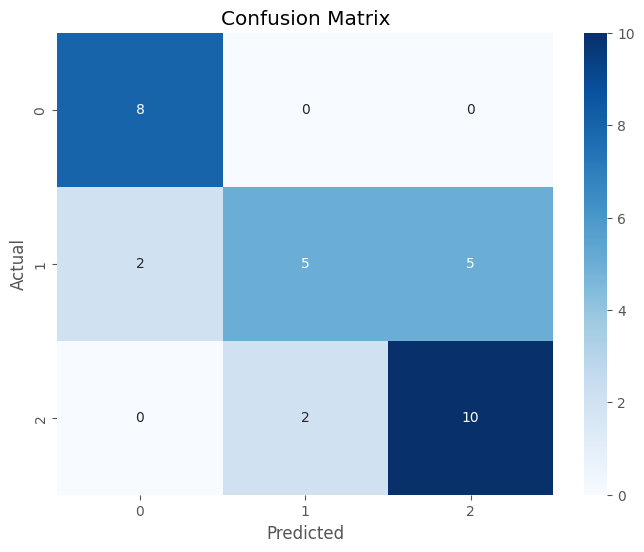

C:\Users\mskst.000\AppData\Local\Temp\ipykernel_27740\2370290659.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


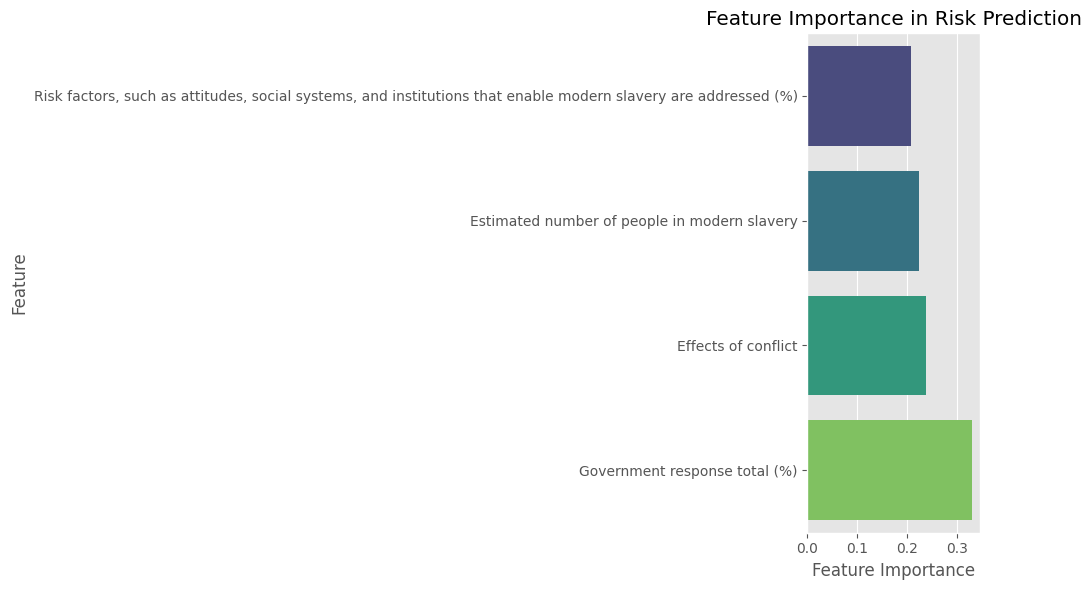

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set style for all plots
plt.style.use('ggplot')
sns.set_palette('viridis')

# Load cleaned data
df = pd.read_csv("../data/cleaned_data.csv")

# Selecting relevant features
features = ["Risk factors, such as attitudes, social systems, and institutions that enable modern slavery are addressed (%)", "Effects of conflict","Estimated number of people in modern slavery", "Government response total (%)"]  
target = "Total Vulnerability score (%)"  

# Drop rows with missing values
df = df.dropna(subset=features + [target])

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df[features + [target]].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=target, bins=30, kde=True)
plt.title('Distribution of Total Vulnerability Score')
plt.xlabel('Vulnerability Score')
plt.ylabel('Count')
plt.show()

# Convert categorical target variable to numerical classes
df[target] = pd.qcut(df[target], q=3, labels=[0, 1, 2])

# Training and Testing Data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
})
importance_df = importance_df.sort_values('Importance', ascending=True)

sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Risk Prediction')
plt.tight_layout()
plt.show()